### **State University of Campinas - UNICAMP** </br>
**Course**: MC886A </br>
**Professor**: Marcelo da Silva Reis </br>
**TA (PED)**: Marcos Vinicius Souza Freire

---

### **Hands-On: Introduction to Machine Learning and Tensors in PyTorch**
##### Notebook: 01 PyTorch Basics
---

### **Table of Contents**

1. [**Objectives**](#objectives) </br>
2. [**Prerequisites**](#prerequisites) </br>
3. [**What is PyTorch**](#what-is-pytorch) </br>
4. [**What is a Tensor**](#what-is-a-tensor) </br>
5. [**Convert an Image to a Tensor**](#convert-an-image-to-a-tensor) </br>
6. [**Basic Tensor Operations**](#basic-tensor-operations) </br>
7. [**Why Tensors Matter in Machine Learning**](#why-tensors-matter-in-machine-learning) </br>
8. [**Broadcasting and Batches**](#broadcasting-and-batches) </br>
9. [**GPU Acceleration**](#gpu-acceleration) </br>
10. [**SUMMARY**](#summary) </br>
11. [**REFERENCES**](#references)

---

#### **Objectives**
- Understand what tensors are and why they’re important in machine learning.
- Learn how to create and manipulate tensors in PyTorch.

---

#### **Prerequisites**
- Install PyTorch and some extra packages.
- Have Python and a Jupyter Notebook ready (great for interactive demos).

Installing Pytorch (for all setups in `00-setup.ipynb`):

- `pip install torch torchvision`

- `pip install nbformat`

- To plot pretty graphs, you can use Plotly
`pip install plotly`

---

#### **What is PyTorch?**  🐍🔥

It is a Python machine learning framework based in Python and Torch.

---

#### **What is a Tensor?**

- Rabanser et al. (2017) define a tensor as a generalization of a matrix to a higher dimensions wich can be treated as multidimensional fields.

- Basically, "in machine learning, we deal with lots of data: numbers, images, text, etc. A tensor is like a super flexible container for that data. Think of it as a multi-dimensional array. A scalar (single number) is a 0D tensor, a vector (list of numbers) is a 1D tensor, a matrix (grid of numbers) is a 2D tensor, and anything with more dimensions (like an image or video) is a higher-dimensional tensor."
- PyTorch, a popular machine learning library, uses tensors as its core data structure, similar to NumPy arrays but with extra powers like GPU acceleration.

---

*e.g.:*

In [ ]:
# Just a function to break two lines
def break_line():
    print("\n")

In [ ]:
import torch

# Scalar (0D tensor (scalar))
scalar = torch.tensor(5)
print("Scalar (0D):")
print(scalar)
print("Shape:", scalar.shape)
break_line()

# Vector (1D tensor)
vector = torch.tensor([1, 2, 3])
print("Vector (1D):")
print(vector)
print("Shape:", vector.shape)
break_line()

# Matrix (2D tensor)
matrix = torch.tensor([[1, 2], [3, 4]])
# print("Matrix (2D):", matrix, "| Shape:", matrix.shape)
print("Matrix (2D):")
print(matrix)
print("Shape:", matrix.shape)
break_line()

# 3D tensor
tensor_3d = torch.tensor([[[1, 2], [3, 4]], [[5, 6], [7, 8]]])
print("3D Tensor:")
print(tensor_3d)
print("Shape:", tensor_3d.shape)

---

#### **Convert an Image to a Tensor**

Images are perfect examples of data we can represent as tensors. A color image has three dimensions: height, width, and color channels (Red, Green, Blue). We’ll use PyTorch and the Pillow library (`pip install Pillow`) to load an image and turn it into a tensor.

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

In [ ]:
from PIL import Image
import torchvision.transforms as transforms

# Load an image
image = Image.open("/content/drive/MyDrive/TA-PED/CLASSROOM/hands-on_00/img/possum.png")

# Define a transform to convert the image to a tensor
transform = transforms.ToTensor()

# Convert the image to a tensor
image_tensor = transform(image)

# Print tensor details
print("Image Tensor Shape:", image_tensor.shape)
break_line()
print("Tensor Data (first few values):")
print(f'{image_tensor[0, :2, :2]}')
# Show a small portion of channel 0

$BECAUSE$   $EVERYTHING$   $IS$   $POSSUMBLE$

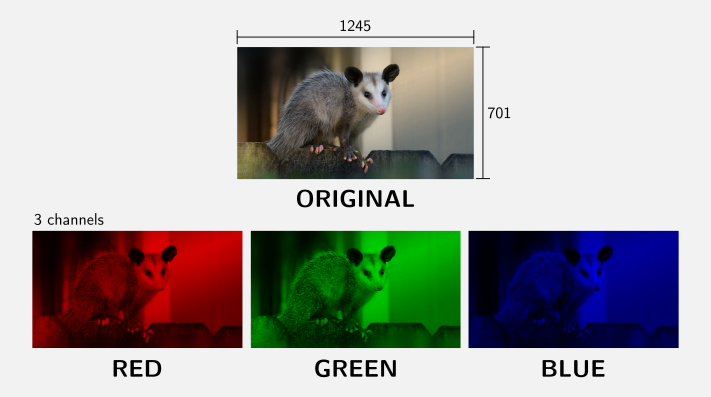)

Source: Modified from It's a Southern Thing by Amber Sutton ([https://www.southernthing.com/in-defense-of-opossums-2646851524.html](https://www.southernthing.com/in-defense-of-opossums-2646851524.html))

- The shape `[3, 701, 1245]` means 3 color channels (RGB), 701 pixels high, and 1245 pixels wide.
- The values are between 0 and 1 because ToTensor() automatically scales pixel values (originally 0–255) to a range suitable for machine learning.
- This tensor can now be fed into a neural network for tasks like image classification!

---

#### **Basic Tensor Operations**

Now that we have a tensor, let’s do something with it. In machine learning, we often manipulate tensors: add them, multiply them, or reshape them.

In [ ]:
import torch
from PIL import Image
import torchvision.transforms as transforms
import matplotlib.pyplot as plt

# Load and convert image to tensor (force RGB mode to remove alpha channel)
image = Image.open("/content/drive/MyDrive/TA-PED/hands-on_00/img/possum_original.png").convert("RGB")

# Define a transform to convert the image to a tensor
transform = transforms.ToTensor()

# Convert the image to a tensor
image_tensor = transform(image)

# Print tensor details
print("Image Tensor Shape:", image_tensor.shape)  # Should be [3, H, W]

# Brighten the image by adding a value to the tensor
brightened_tensor = image_tensor + 0.2
brightened_tensor = torch.clamp(brightened_tensor, 0, 1)  # Keep values between 0 and 1

# Convert tensors back to numpy for plotting
original_image_np = image_tensor.permute(1, 2, 0).numpy()  # [H, W, C]
brightened_image_np = brightened_tensor.permute(1, 2, 0).numpy()

# Plot side-by-side
plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)
plt.imshow(original_image_np)
plt.title("Original Image")
plt.axis("off")

plt.subplot(1, 2, 2)
plt.imshow(brightened_image_np)
plt.title("Brightened Image")
plt.axis("off")

plt.show()

**Key points:**

- We just brightened the image by adding 0.2 to every pixel value. torch.clamp ensures the values stay between 0 and 1.
- This is a simple example, but tensor operations like this are the backbone of training machine learning models.

Based on what we have seem so far, a tensor is a generalization of scalars, vectors, and matrices to any number of dimensions. It’s the core data structure in machine learning because it can represent anything: numbers, images, time series, or even batches of data.

*e.g.:*

In [ ]:
import torch

# Examples of different tensor ranks
scalar = torch.tensor(5)                # 0D
vector = torch.tensor([1, 2, 3])        # 1D
matrix = torch.tensor([[1, 2], [3, 4]]) # 2D
tensor_3d = torch.randn(2, 3, 4)        # 3D (random values)

print("Scalar (0D):", scalar, "Shape:", scalar.shape)
break_line()
print("Vector (1D):", vector, "Shape:", vector.shape)
break_line()
print("Matrix (2D):")
print(matrix)
print("Shape:", matrix.shape)
break_line()
print("3D Tensor:", tensor_3d.shape)

**Key points**:
- The `.shape` tells us how many elements are in each dimension. For an image tensor `[3, 256, 256]`, it’s 3 channels × 256 height × 256 width.
- In ML, we often deal with high-rank tensors, like 4D for batches of images: `[batch_size, channels, height, width]`.

---

#### **Why Tensors Matter in Machine Learning**

- Tensors are the language of neural networks. They hold inputs (e.g., images), weights, and outputs, and allow us to perform fast, parallel computations (Antiga et al. (2020)[2]).
- PyTorch tensors can move to GPUs, making them perfect for training big models.
- Example: An image is a 3D tensor. A batch of 10 images becomes a 4D tensor: `[10, 3, 256, 256]`. Tensors scale to any data size.

Let’s explore more common operations we do with tensors: creation, arithmetic, reshaping, and indexing. These are building blocks for neural networks.

In [ ]:
import torch

# Creation
zeros = torch.zeros(2, 3)  # 2x3 tensor of zeros
ones = torch.ones(3, 2)    # 3x2 tensor of ones
random = torch.randn(2, 2) # 2x2 tensor of random numbers (normal dist.)
print("Zeros:\n", zeros)
break_line()
print("Ones:\n", ones)
break_line()
print("Random:\n", random)
break_line()

# Arithmetic
A = torch.tensor([[1, 2], [3, 4]])
B = torch.tensor([[5, 6], [7, 8]])
sum_AB = A + B             # Element-wise addition
product_AB = A * B         # Element-wise multiplication
matmul_AB = torch.matmul(A, B)  # Matrix multiplication
print("Sum:\n", sum_AB)
break_line()
print("Product:\n", product_AB)
break_line()
print("Matrix Multiply:\n", matmul_AB)
break_line()

# Reshaping
tensor = torch.tensor([1, 2, 3, 4, 5, 6])
reshaped = tensor.reshape(2, 3)  # Reshape to 2x3
print("Original:", tensor, "Shape:", tensor.shape)
break_line()
print("Reshaped:\n", reshaped, "Shape:", reshaped.shape)
break_line()

# Indexing
print("First row of reshaped:", reshaped[0, :])
break_line()
print("Element at (1,1):", reshaped[1, 1])

**Key Points**:
- **Creation**: We can make tensors of zeros, ones, or random values—useful for initializing weights.
- **Arithmetic**: Addition and multiplication can be element-wise or matrix-style. `matmul` for matrix product of two tensors.
- **Reshaping**: Reshaping changes how we view the data without altering it—handy for preparing inputs.
- **Indexing**: We can grab specific parts of a tensor, like rows or single values.

An image is a 3D tensor. A batch of 10 images becomes a 4D tensor: `[10, 3, 256, 256]`. Tensors scale to any data size

---

#### **Broadcasting and Batches**

- Tensors support broadcasting, automatically expanding dimensions for operations. This is huge for handling batches of data.

In [ ]:
# Broadcasting example
A = torch.tensor([[1, 2], [3, 4]])  # Shape: [2, 2]
b = torch.tensor([1, 1])            # Shape: [2]
result = A + b                      # b is broadcasted to [2, 2]
print("Broadcasted Sum:\n", result)
break_line()

# Batch example
batch_images = torch.randn(4, 3, 64, 64)  # 4 images, 3 channels, 64x64
print("Batch Shape:", batch_images.shape)
break_line()
batch_mean = torch.mean(batch_images, dim=0)  # Mean across batch
print("Mean Image Shape:", batch_mean.shape)  # [3, 64, 64]

**Key Points**:
- Broadcasting lets us add a vector to a matrix without manual repetition. PyTorch aligns shapes for us.
- Batches (e.g., 4 images) are 4D tensors. Operations like `mean` can reduce dimensions, useful for normalization.

---

#### **GPU Acceleration**

- Tensors in PyTorch can run on GPUs, making operations lightning-fast for big data.

In [ ]:
if torch.cuda.is_available():
    gpu_tensor = image_tensor.cuda()  # Move to GPU
    gpu_result = gpu_tensor * 2       # Operation on GPU
    print("GPU Tensor Shape:", gpu_result.shape)
else:
    print("No GPU available, staying on CPU.")

If GPU is available 😊 </br>
If GPU is not available 😞

---

#### **BONUS: Let's explore a little more our cute Possum**

In [ ]:
import torch
from PIL import Image
import torchvision.transforms as transforms
import matplotlib.pyplot as plt
import torch.nn.functional as F

# Load and convert image to tensor
image = Image.open("/content/drive/MyDrive/TA-PED/CLASSROOM/hands-on_00/img/possum_original.png").convert("RGB")
transform = transforms.ToTensor()
image_tensor = transform(image)
print("Original Shape:", image_tensor.shape)  # e.g., [3, H, W]

# Operation 1: Extract one channel (e.g., Red)
red_channel = image_tensor[0, :, :]  # Shape: [H, W]
print("Red Channel Shape:", red_channel.shape)

# Operation 2: Resize (downsample)
resized_tensor = F.interpolate(
    image_tensor.unsqueeze(0), size=(128, 128), mode='bilinear'
).squeeze(0)
print("Resized Shape:", resized_tensor.shape)  # [3, 128, 128]

# Operation 3: Brighten (element-wise addition)
brightened_tensor = image_tensor + 0.2
brightened_tensor = torch.clamp(brightened_tensor, 0, 1)  # Keep values in [0,1]

# Convert tensors to numpy for plotting
original_np = image_tensor.permute(1, 2, 0).numpy()      # [H, W, 3]
red_channel_np = red_channel.numpy()                     # [H, W]
resized_np = resized_tensor.permute(1, 2, 0).numpy()     # [128, 128, 3]
brightened_np = brightened_tensor.permute(1, 2, 0).numpy()  # [H, W, 3]

# Plot all four
plt.figure(figsize=(10, 5))

# Original Image
plt.subplot(2, 2, 1)
plt.imshow(original_np)
plt.title("Original Image")
plt.axis("off")

# Red Channel
plt.subplot(2, 2, 2)
plt.imshow(red_channel_np, cmap='gray')
plt.title("Red Channel")
plt.axis("off")

# Resized Image
plt.subplot(2, 2, 3)
plt.imshow(resized_np)
plt.title("Resized Image (128x128)")
plt.axis("off")

# Brightened Image
plt.subplot(2, 2, 4)
plt.imshow(brightened_np)
plt.title("Brightened Image")
plt.axis("off")

plt.tight_layout()  # Adjust spacing between subplots
plt.show()

In [ ]:
import torch
import torch.nn.functional as F

# 1. Define a simplified 3x3 Gaussian kernel.
# This kernel is a common approximation for blurring.
gaussian_kernel = torch.tensor([
    [1/16, 2/16, 1/16],
    [2/16, 4/16, 2/16],
    [1/16, 2/16, 1/16]
], dtype=torch.float32)

# Reshape the kernel to match the expected shape for conv2d:
# (out_channels, in_channels, kernel_height, kernel_width)
gaussian_kernel = gaussian_kernel.view(1, 1, 3, 3)
print("Gaussian Kernel:\n", gaussian_kernel)

# 2. Create a dummy grayscale image tensor.
# For simplicity, we define a 5x5 image.
# The tensor shape for conv2d must be (batch_size, channels, height, width).
dummy_image = torch.tensor([
    [10, 20, 30, 20, 10],
    [20, 40, 60, 40, 20],
    [30, 60, 90, 60, 30],
    [20, 40, 60, 40, 20],
    [10, 20, 30, 20, 10]
], dtype=torch.float32).unsqueeze(0).unsqueeze(0)
print("\nOriginal Image:\n", dummy_image)

# 3. Apply the convolution using the Gaussian kernel.
# The 'padding=1' argument ensures that the output image has the same dimensions as the input.
blurred_image = F.conv2d(dummy_image, gaussian_kernel, padding=1)
print("\nBlurred Image:\n", blurred_image)


In [ ]:
import torch
from PIL import Image
import torchvision.transforms as transforms
import matplotlib.pyplot as plt
import torch.nn.functional as F

# Load and convert image to tensor
image = Image.open("/content/drive/MyDrive/TA-PED/CLASSROOM/hands-on_00/img/possum_original.png").convert("RGB")  # Adjust path as needed
transform = transforms.ToTensor()
image_tensor = transform(image)
print("Original Shape:", image_tensor.shape)  # e.g., [3, H, W]

# Prepare for convolution (add batch dimension)
img_tensor = image_tensor.unsqueeze(0)  # Shape: [1, 3, H, W]

# Operation 1: Brighten the image
brightened_tensor = image_tensor + 0.2
brightened_tensor = torch.clamp(brightened_tensor, 0, 1)

# Operation 2: Apply Gaussian filter (convolution)
# Define a 3x3 Gaussian kernel
gaussian_kernel = torch.tensor([
    [1/16, 2/16, 1/16],
    [2/16, 4/16, 2/16],
    [1/16, 2/16, 1/16]
], dtype=torch.float32)
gaussian_kernel = gaussian_kernel.view(1, 1, 3, 3)  # [1, 1, 3, 3]

# Replicate kernel for 3 channels (RGB)
channels = img_tensor.size(1)  # 3 channels
gaussian_kernel = gaussian_kernel.repeat(channels, 1, 1, 1)  # [3, 1, 3, 3]

# Print a small portion of the original tensor (e.g., top-left 5x5 of red channel)
print("\nOriginal Tensor (Red Channel, Top-Left 5x5):\n", image_tensor[0, :5, :5])

# Apply convolution
blurred_tensor = F.conv2d(img_tensor, gaussian_kernel, padding=1, groups=channels)
blurred_tensor = blurred_tensor.squeeze(0)  # Shape: [3, H, W]
blurred_tensor = torch.clamp(blurred_tensor, 0, 1)  # Ensure valid range

# Print the same portion of the blurred tensor
print("\nBlurred Tensor (Red Channel, Top-Left 5x5):\n", blurred_tensor[0, :5, :5])

# Convert to numpy for plotting
original_np = image_tensor.permute(1, 2, 0).numpy()
brightened_np = brightened_tensor.permute(1, 2, 0).numpy()
blurred_np = blurred_tensor.permute(1, 2, 0).numpy()

# Plot all three
plt.figure(figsize=(15, 5))
plt.subplot(1, 3, 1)
plt.imshow(original_np)
plt.title("Original Image")
plt.axis("off")
plt.subplot(1, 3, 2)
plt.imshow(brightened_np)
plt.title("Brightened Image")
plt.axis("off")
plt.subplot(1, 3, 3)
plt.imshow(blurred_np)
plt.title("Gaussian Blurred Image")
plt.axis("off")
plt.show()

---

#### **SUMMARY**

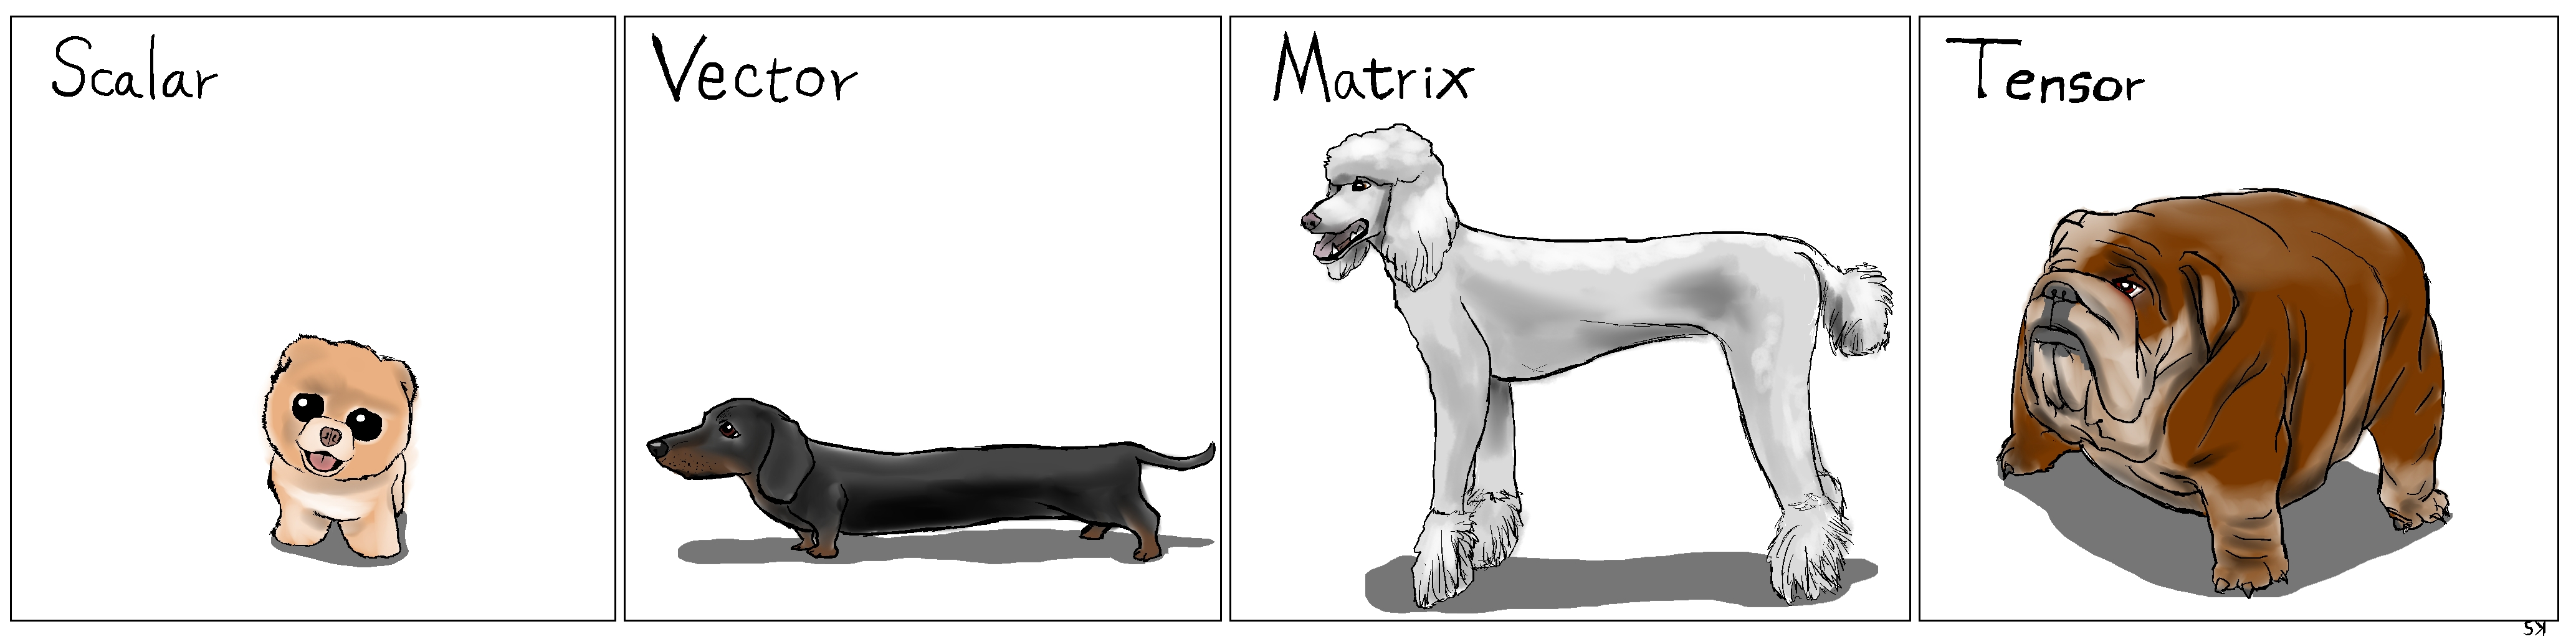

Source: Karl Stratos ([https://karlstratos.com/drawings/drawings.php](https://karlstratos.com/drawings/drawings.php))

---

#### **REFERENCES**

[1] Rabanser, S., Shchur, O., & Günnemann, S. (2017). Introduction to tensor decompositions and their applications in machine learning. arXiv preprint [arXiv:1711.10781](https://arxiv.org/pdf/1711.10781).

[2] Antiga, L. P. G., Stevens, E., & Viehmann, T. (2020). Deep learning with PyTorch. Simon and Schuster.